# Preprocessing the Indonesian Hate & Abusive Text 
The original paper [1] preprocess the data in 5 steps:
1. Lower casing all text, 
2. Data cleaning by removing unnecessary characters such as re-tweet symbol (RT), username, URL, and punctuation
3. Normalization using 'Alay' dictionary 
4. Stemming using PySastrawi [2]
5. Stop words removal using list from [3]

In [1]:
!pip install PySastrawi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [3]:
data = pd.read_csv('data/data.csv', encoding='latin-1')

alay_dict = pd.read_csv('data/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv('data/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

### Text Data

In [4]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [6]:
data.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [7]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


### Alay Dict

In [8]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


### ID Stopword

In [9]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head()


Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


# Preprocess

In [10]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe


In [11]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [12]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [13]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0
8,admin belanja po nak makan ais kepal milo ais ...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [16]:
data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [17]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [20]:
def classification(HS):
    if (HS == 1):
        return 'Yes'
    elif (HS == 0):
        return 'No'


def classification(Abusive):
    if (Abusive == 1):
        return 'Yes'
    elif (Abusive == 0):
        return 'No'


data['Classification Type HS'] = data['HS'].apply(lambda x: classification(x))
data['Classification Type Abusive'] = data['Abusive'].apply(lambda x: classification(x))
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type classification HS,Type classification Abusive,Classification Type HS,Classification Type Abusive
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0,Yes,Yes,Yes,Yes
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0,No,Yes,No,Yes
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0,No,No,No,No
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0,No,No,No,No
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Yes,Yes,Yes,Yes


In [24]:
Classification = data[["Tweet", "HS", "Abusive",
                  "Classification Type HS", "Classification Type Abusive"]]
Classification.head()

,Tweet,HS,Abusive,Classification Type HS,Classification Type Abusive
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,Yes,Yes
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,No,Yes
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,No,No
3,ku tau mata sipit lihat,0,0,No,No
4,kaum cebong kafir lihat dongok dungu haha,1,1,Yes,Yes


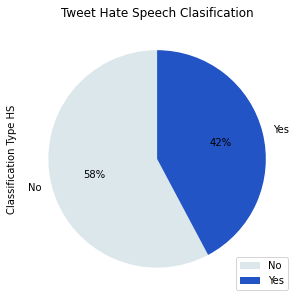

In [39]:
my_color = ['#dce7ec', '#2254c5']
Classification['Classification Type HS'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.f%%', startangle=90, shadow=False, colors=my_color)

plt.legend(['No', 'Yes'])
plt.title('Tweet Hate Speech Clasification')

plt.show()

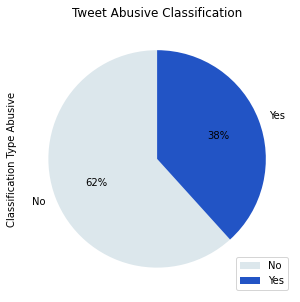

In [38]:
my_color = ['#dce7ec', '#2254c5']
Classification['Classification Type Abusive'].value_counts().plot(
    kind='pie', figsize=(5, 5), autopct='%1.f%%', startangle=90, shadow=False, colors=my_color)

plt.legend(['No', 'Yes'])
plt.title('Tweet Abusive Classification')

plt.show()

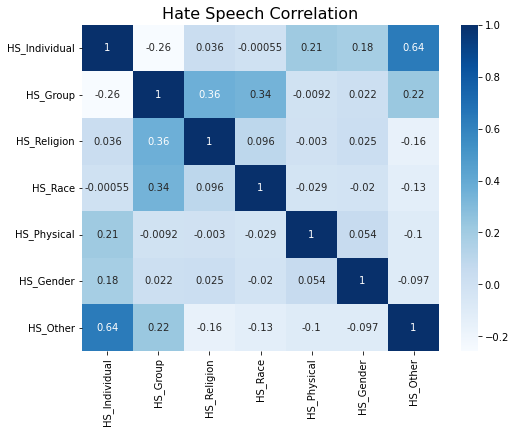

In [28]:
import seaborn as sns
HS_type = data[["HS_Individual", "HS_Group", "HS_Religion",
               "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]]
corr = HS_type.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(HS_type.corr(), annot=True, cmap='Blues')

plt.title('Hate Speech Correlation', size=16)

plt.show()

In [29]:
df1 = data[['HS_Individual', 'HS_Group']]
df1.sum()

HS_Individual    3575
HS_Group         1986
dtype: int64

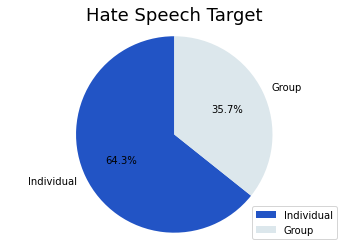

In [42]:
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)
my_color = ['#2254c5', '#dce7ec']

fig1, ax1 = plt.subplots()
ax1.pie(HS1, labels=target_HS, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=my_color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Hate Speech Target', fontsize=18)
ax1.legend(target_HS, loc="best")
plt.show()

In [31]:
df2 = data[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df2.sum()

HS_Religion     793
HS_Race         566
HS_Physical     323
HS_Gender       306
HS_Other       3740
dtype: int64

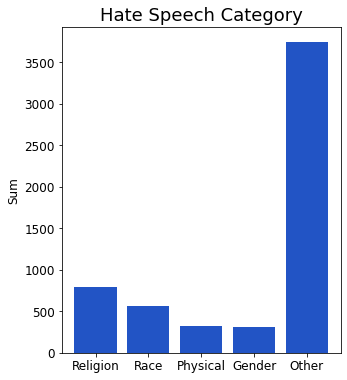

In [32]:
HS_Type = ("Religion", "Race", "Physical", "Gender", "Other")
HS1 = (793, 566, 323, 306, 3740)
my_color = '#2254c5'

plt.figure(figsize=(5, 6))
plt.bar(HS_Type, HS1, color=my_color,)

plt.title('Hate Speech Category', size=18,)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [33]:
df3 = data[['HS_Weak', 'HS_Moderate', 'HS_Strong']]
df3.sum()

HS_Weak        3383
HS_Moderate    1705
HS_Strong       473
dtype: int64

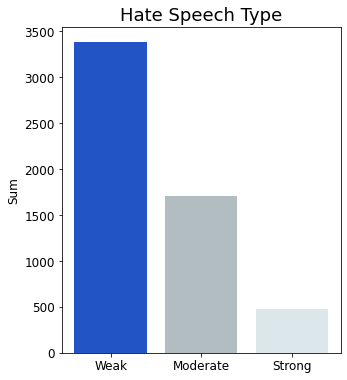

In [35]:
HS_Type = ("Weak", "Moderate", "Strong")
HS1 = (3383, 1705, 473)
my_color = '#2254c5', '#b2bdc2', '#dce7ec'

plt.figure(figsize=(5, 6))
plt.bar(HS_Type, HS1, color=my_color,)

plt.title('Hate Speech Type', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Save Preprocessed Data

In [ ]:
data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)